In [97]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from utils import make_meshgrid, plot_contours
from math import e
import pandas as pd



%matplotlib inline

np.random.seed(42) # set a seed so that the results are consistent

## make_moons
Scikit Learn has a built in binary classification toy dataset called make_moons that should be very difficult for a linear regression to classify.

Lets load it and try.

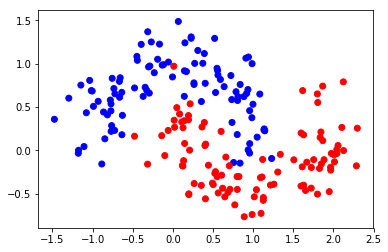

In [2]:

noisy_moons = make_moons(n_samples=200, noise=.2)
X, y = noisy_moons
colors=['r' if item == 1 else 'b' for item in y]
plt.scatter(X[:,0], X[:,1], c=colors, cmap=plt.cm.coolwarm)
plt.show()

In [3]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Lets look at how the linear model performed...

Logit Accuracy: 85.5%


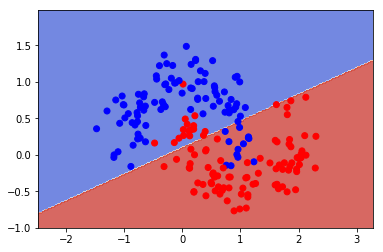

In [4]:
print("Logit Accuracy: {0}%".format(accuracy_score(y, lr.predict(X)) * 100))
xx,yy = make_meshgrid(X,y)
plot_contours(lr, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=colors, cmap=plt.cm.coolwarm)


# Multilayer Perceptron
I'm going to implement an MLP from scratch here.  This is the first and last time we will do this, in this class as there are frameworks for this that make it much easier. With that said, it's important you run and understand this code.

In [5]:
def  sigmoid(z):
         y  =  1  /  (1  +  e  **  -z)
         return  y

In [85]:
def initialize_parameters(n_x, n_h, n_y):    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [86]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [87]:
def compute_cost(y_hat, y, parameters):


    m = y.shape[1] # number of example
    logprobs = np.dot(np.log(y_hat), y.T) + np.dot(np.log(1-y_hat), (1 - y).T)
    cost = -1/m * np.sum(logprobs)    
    cost = np.squeeze(cost)
    return cost

In [88]:
def backward_propagation(parameters, cache, X, y):
    m = X.shape[1]
    

    W1 = parameters['W1']
    W2 = parameters['W2']
        
    A1 = cache['A1']
    A2 = cache['A2']
    

    dZ2= A2 - y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)  * (1 - np.power(A1, 2))
    dW1 =  1/m * np.dot(dZ1,X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [89]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [95]:
def train_network(X, y, hidden_layer_size, num_iterations = 10000, print_cost=False):
    y=y.reshape(-1,1).T
    X=X.T
    parameters = initialize_parameters(X.shape[0], hidden_layer_size, 1)
    costs=[]
    
    for i in range(0, num_iterations):
         

        y_hat, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(y_hat, y, parameters)
        costs.append(cost)
 
        grads = backward_propagation(parameters, cache, X, y)
 
        parameters = update_parameters(parameters, grads)
        
        

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return costs, parameters
    
    
    
    

## Network Training

In [96]:
costs, parameters = train_network(X,y,10, num_iterations=30000, print_cost=False)

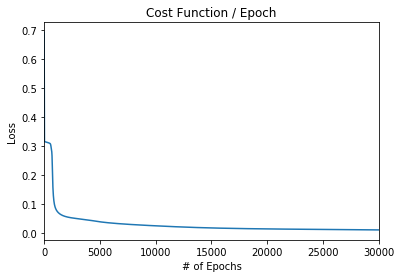

In [107]:
plt.title("Cost Function / Epoch")
ax=pd.Series(costs).plot()
ax.set_xlabel("# of Epochs")
ax.set_ylabel("Loss")
plt.show()

## MLP Decision Boundary

In [108]:
def predict(parameters, X):

    y_hat, cache = forward_propagation(X, parameters)
    predictions = (y_hat > 0.5)    
    return predictions


In [116]:
y_hat = predict(parameters, X.T).T

MLP Accuracy: 99.5%


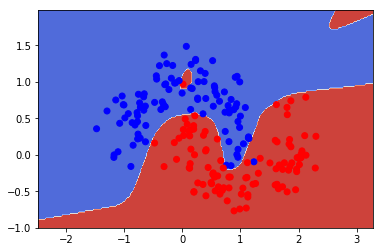

In [123]:
print("MLP Accuracy: {0}%".format(accuracy_score(y, y_hat) * 100))
xx,yy = make_meshgrid(X,y)

Z = predict(parameters, np.c_[xx.ravel(), yy.ravel()].T)
Z = Z.reshape(xx.shape)
out = plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm)
plt.scatter(X[:,0], X[:,1], c=colors, cmap=plt.cm.coolwarm)
plt.show()